In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)



In [3]:
cd "C:\Users\aijul\Desktop\dataScience-\Real_Estate_Project\dataset"

C:\Users\aijul\Desktop\dataScience-\Real_Estate_Project\dataset


In [4]:
df = pd.read_csv("gurgaon_properties_cleaned_v2.csv")

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,4.0,West,Relatively New,NaN,NaN,900.0,0,0,0,0,0,1,28
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,2,37
2,flat,tulsiani easy in homes,sector 47,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,12.0,NaN,New Property,NaN,NaN,595.0,0,0,0,0,0,1,36
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,2.0,NaN,Undefined,NaN,NaN,1200.0,1,0,0,0,0,1,76
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,5.0,NaN,Under Construction,1345.0,NaN,NaN,1,0,0,0,0,1,0


In [6]:
df.duplicated().sum()

127

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 3803
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3677 non-null   object 
 1   society              3676 non-null   object 
 2   sector               3677 non-null   object 
 3   price                3661 non-null   float64
 4   price_per_sqft       3661 non-null   float64
 5   area                 3661 non-null   float64
 6   areaWithType         3677 non-null   object 
 7   bedRoom              3677 non-null   int64  
 8   bathroom             3677 non-null   int64  
 9   balcony              3677 non-null   object 
 10  floorNum             3658 non-null   float64
 11  facing               2632 non-null   object 
 12  agePossession        3677 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1692 non-null   float64
 15  carpet_area          1869 non-null   f

<AxesSubplot:>

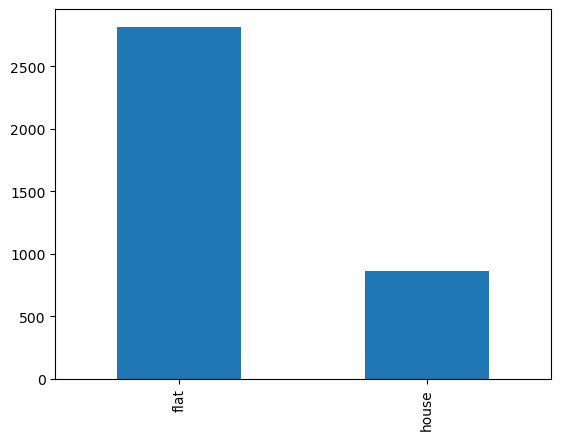

In [9]:
df['property_type'].value_counts().plot(kind='bar')

# Observations
* Flats are in majority(75 percent) and there are less number of houses(~25 percent)
* No missing values

### Society

In [10]:
df['society'].value_counts()

independent                             488
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
                                       ... 
smartworld one dxp                        1
the arzoo cghs                            1
woodstock floors                          1
tashee capital gateway                    1
huda floor                                1
Name: society, Length: 674, dtype: int64

In [11]:
df[df['society'] != 'independent']['society'].value_counts(normalize= True).cumsum().head(75)

tulip violet                            0.023526
ss the leaf                             0.046424
dlf new town heights                    0.059598
shapoorji pallonji joyville gurugram    0.072773
signature global park                   0.083752
                                          ...   
umang winter hills                      0.490590
dlf the primus                          0.494668
ats kocoon                              0.498745
central park flower valley              0.502509
ireo the corridors                      0.506274
Name: society, Length: 75, dtype: float64

In [12]:
society_counts = df['society'].value_counts()

#Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts>100).sum(),
    "High (50-100)": ((society_counts>=50) & (society_counts <=100)).sum(),
    "Average (10-49)": ((society_counts >=10) & (society_counts<50)).sum(),
    "Very Low (1)": (society_counts== 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Very Low (1)': 306}

<AxesSubplot:>

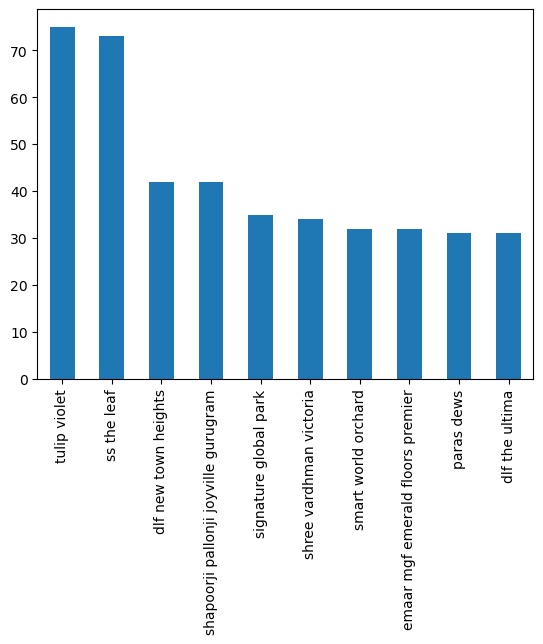

In [13]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [14]:
df['society'].isnull().sum()

1

In [15]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2711,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,NaN,NaN,Under Construction,NaN,1625.0,NaN,0,0,0,0,0,1,0


# Observations

*  Around 13% properties comes under independent tag. 
* There are 675 societies.
* The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties.
#### come under the remaining 600 societies
* Very High (>100): Only 1 society has more than 100 listings.
* High (50-100): 2 societies have between 50 to 100 listings.
* Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
* Low (2-9): 273 societies have between 2 to 9 listings.
* Very Low (1): A significant number, 308 societies, have only 1 listing.
##### 1 missing value


### Sector

In [16]:
df['sector'].value_counts().shape

(107,)

df['sector'].value_counts().head(20).plot(kind='bar')

In [17]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins ={
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)" : ((sector_counts >= 10) & (sector_counts<10)).sum(),
    "Low (2-9)" : ((sector_counts>1) & (sector_counts <10)).sum(),
    "Very Low (1)": (sector_counts ==1).sum()
}
sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 0,
 'Low (2-9)': 20,
 'Very Low (1)': 0}

## Observations
* There are a total of 104 unique sectors in the dataset.
#### Frequency distribution of sectors:
* Very High (>100): 3 sectors have more than 100 listings.
* High (50-100): 25 sectors have between 50 to 100 listings.
* Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
* Low (2-9): 16 sectors have between 2 to 9 listings.
* 
Very Low (1): Interestingly, there are no sectors with only 1 listing.

### Price

In [18]:
df['price'].isnull().sum()

16

In [19]:
df['price'].describe()

count    3661.000000
mean        2.532491
std         2.980355
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

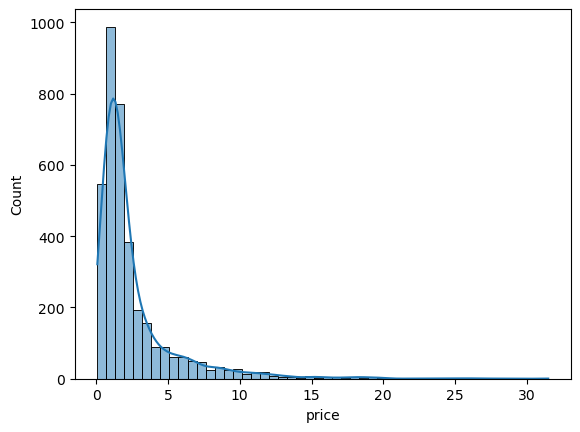

In [20]:
sns.histplot(df['price'], kde = True, bins=50)

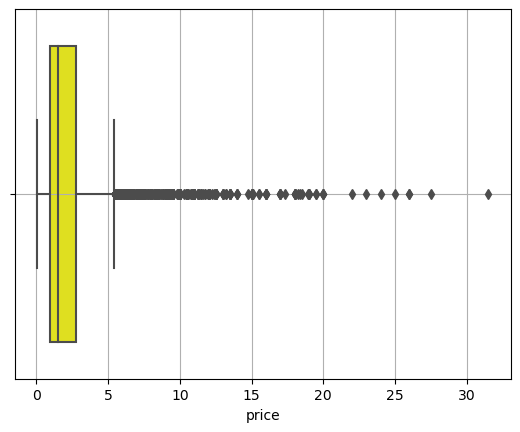

In [21]:
sns.boxplot(x=df['price'], color = 'yellow')
plt.grid()

### Descriptive Statistics:
* Count: There are 3,661 non-missing price entries.
* Mean Price: The average price is approximately 2.53 crores.
* Median Price: The median (or 50th percentile) price is 1.52 crores.
* Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
* Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
* IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.
#### Visualizations:
* Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
* Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
#### Missing Values: There are 16 missing values in the price column.

In [22]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness, kurtosis)

3.2802013371026444 14.940148798688996


* Skewness: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

* Kurtosis: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [23]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01,0.05, 0.95, 0.99])
quantiles

0.01     0.25
0.05     0.37
0.95     8.50
0.99    15.26
Name: price, dtype: float64

### Quantile Analysis
* 1% Quantile: Only 1% of properties are priced below 0.25 crores.
* 5% Quantile: 5% of properties are priced below 0.37 crores.
* 95% Quantile: 95% of properties are priced below 8.5 crores.
* 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [24]:
# identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price']. describe()['75%']
IQR = Q3- Q1

IQR

1.8

In [25]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [27]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

In [28]:
outliers.shape

(425, 23)

In [29]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

#### Outliers Analysis (IQR method) :
* Based on the IQR method, there are 425 properties considered as outliers.
* These outliers have an average price of approximately 9.24 crores.
* The range for these outliers is from 5.46 crores to 31.5 crores.

<AxesSubplot:>

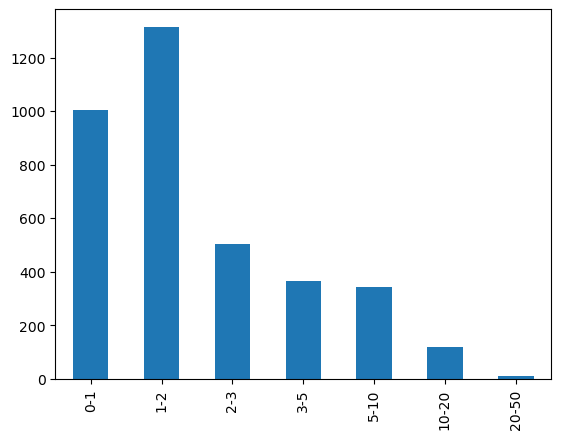

In [30]:
# price binning
bins = [0, 1,2,3,5,10,20,50]
bin_labels = ["0-1", "1-2", "2-3", "3-5","5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels = bin_labels, right = False).value_counts().sort_index().plot(kind='bar')

* The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
* There's a significant drop in the number of properties priced above "5 crores."

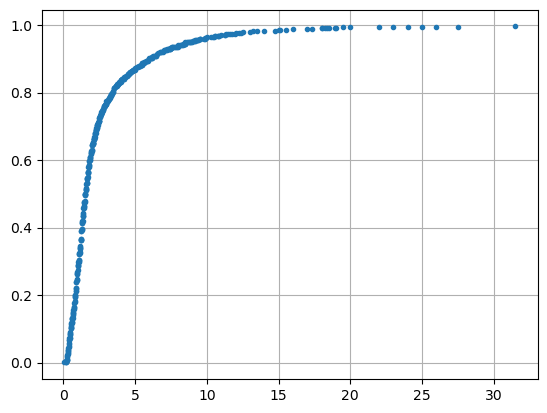

In [32]:
# ecdf plot

ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker= '.', linestyle = 'none')
plt.grid()

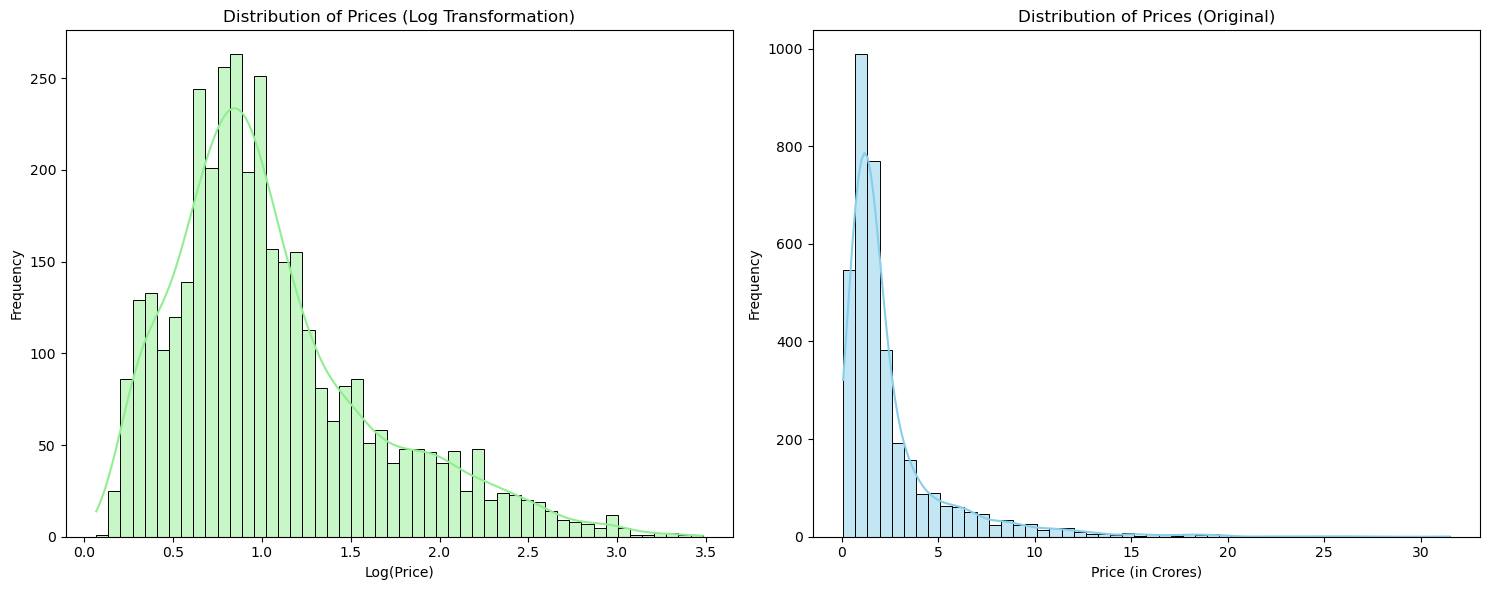

In [41]:
plt.figure(figsize = (15,6))

#distribution plot without log transformation
plt.subplot(1,2,2)
sns.histplot(df['price'], kde= True, bins = 50, color = 'skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel("Frequency")

# distribution plot with log transformation
plt.subplot(1,2,1)
sns.histplot(np.log1p(df['price']), kde= True, bins = 50, color = 'lightgreen')
plt.title('Distribution of Prices (Log Transformation)')
plt.xlabel('Log(Price)')
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

* np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

* Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [44]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness, kurtosis)

1.075000505187993 0.9672910614052839


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


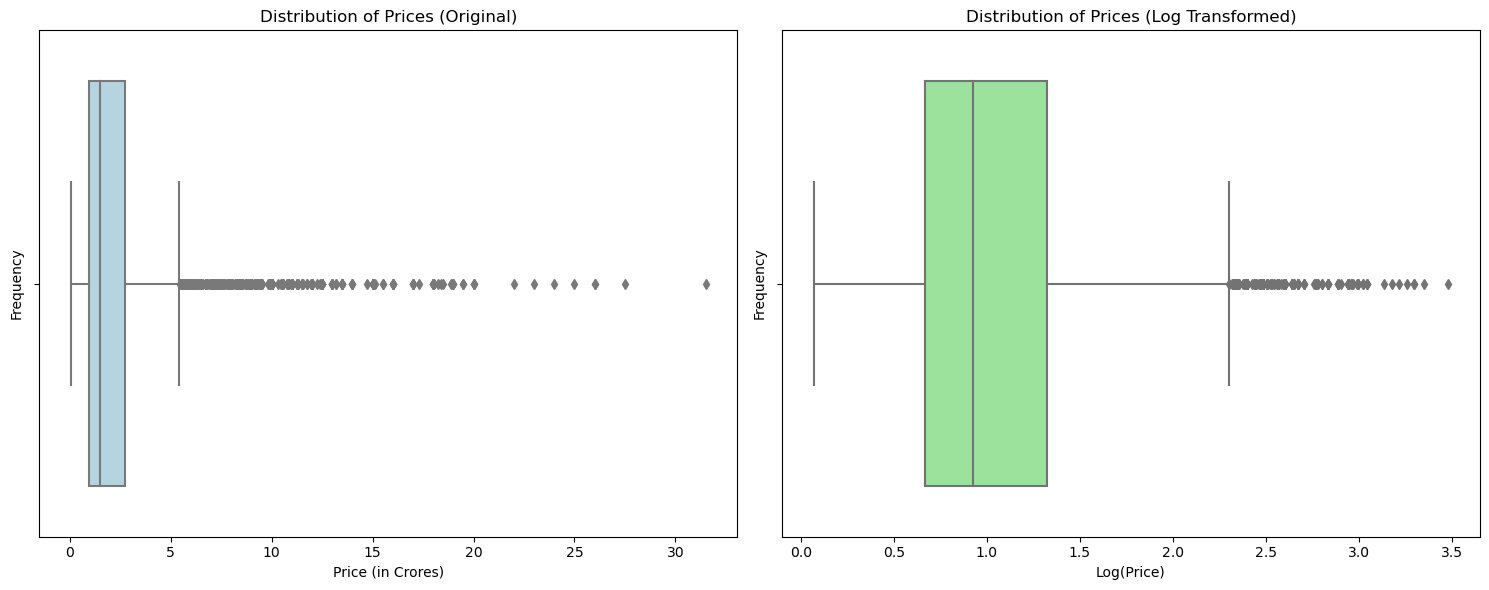

In [46]:
plt.figure(figsize= (15,6))

#Distribution plot without log transformation

plt.subplot(1,2,1)
sns.boxplot(df['price'], color= 'lightblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

#Distribution plot with log transformation

plt.subplot(1,2,2)
sns.boxplot(np.log1p(df['price']), color= 'lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# price_per_sqft

In [47]:
df['price_per_sqft'].isnull().sum()

16

In [48]:
df['price_per_sqft'].describe()

count      3661.000000
mean      13889.242010
std       23207.558315
min           4.000000
25%        6815.000000
50%        9016.000000
75%       13878.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

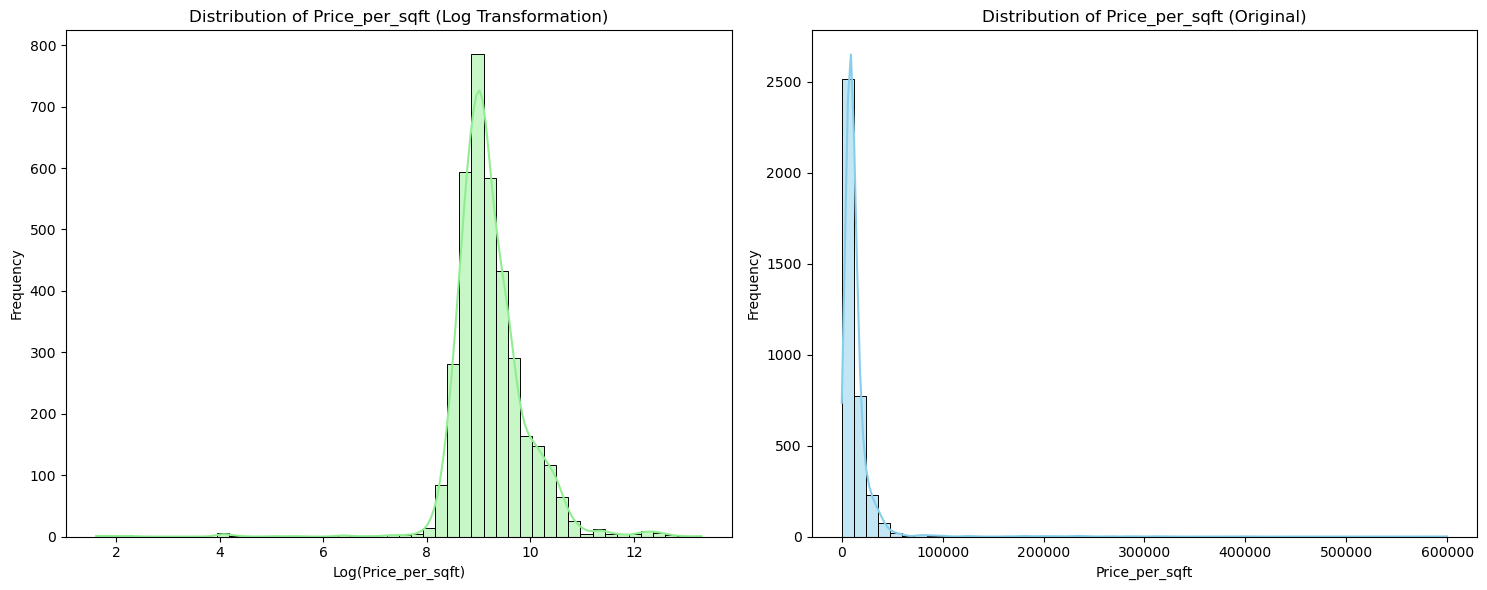

In [54]:
plt.figure(figsize = (15,6))

#distribution plot without log transformation
plt.subplot(1,2,2)
sns.histplot(df['price_per_sqft'], kde= True, bins = 50, color = 'skyblue')
plt.title('Distribution of Price_per_sqft (Original)')
plt.xlabel('Price_per_sqft')
plt.ylabel("Frequency")

# distribution plot with log transformation
plt.subplot(1,2,1)
sns.histplot(np.log1p(df['price_per_sqft']), kde= True, bins = 50, color = 'lightgreen')
plt.title('Distribution of Price_per_sqft (Log Transformation)')
plt.xlabel('Log(Price_per_sqft)')
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

* Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


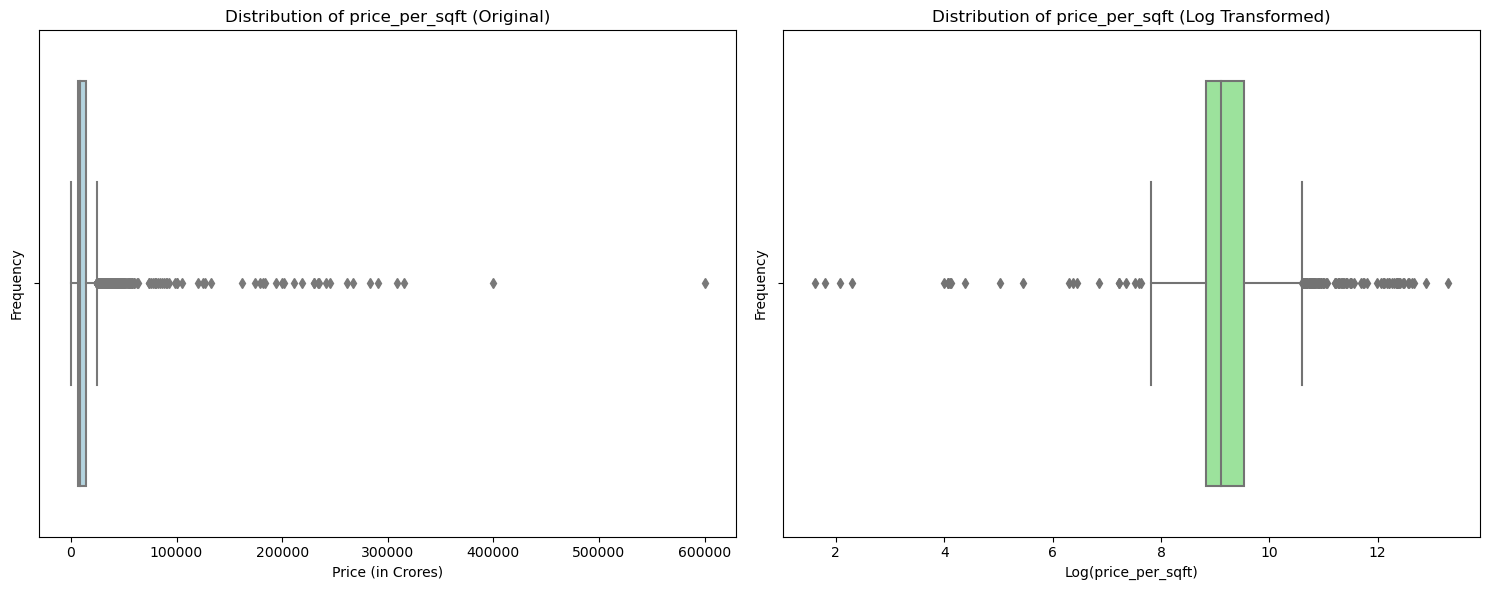

In [55]:
plt.figure(figsize= (15,6))

#Distribution plot without log transformation

plt.subplot(1,2,1)
sns.boxplot(df['price_per_sqft'], color= 'lightblue')
plt.title('Distribution of price_per_sqft (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

#Distribution plot with log transformation

plt.subplot(1,2,2)
sns.boxplot(np.log1p(df['price_per_sqft']), color= 'lightgreen')
plt.title('Distribution of price_per_sqft (Log Transformed)')
plt.xlabel('Log(price_per_sqft)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

#### Observations:
* Potential outliers
* Right Skewed
* 17 missing values

## bedRoom

In [56]:
df['bedRoom'].isnull().sum()

0

<AxesSubplot:>

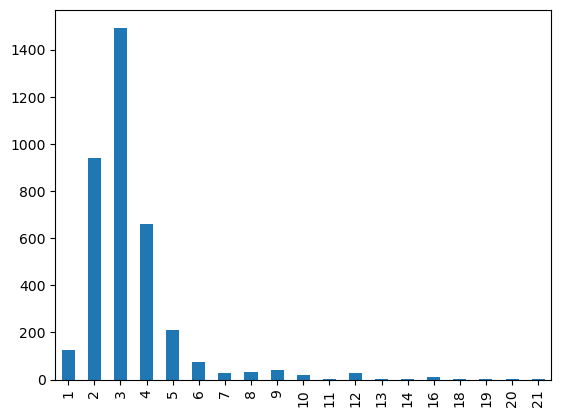

In [57]:
df['bedRoom'].value_counts().sort_index().plot(kind= 'bar')

<AxesSubplot:ylabel='bedRoom'>

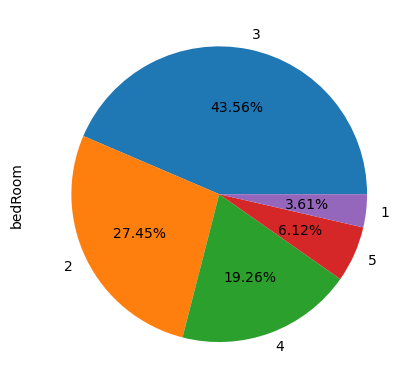

In [58]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie', autopct= '%0.2f%%')